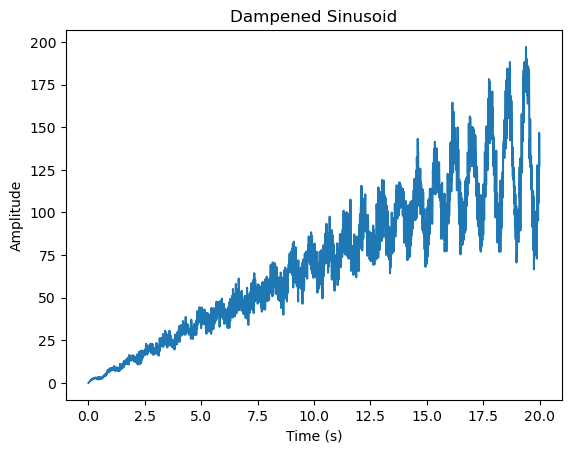

In [26]:
import numpy as np
#Import the Generator from utils- Reload the module to get the latest version
from importlib import reload
import utils
reload(utils)
from utils import series_generator
from utils import stock_price_generator
import matplotlib.pyplot as plt




#Simulate and plot a dampened sinusoid in time



#Genrate the series or download stock data

y, y_train, y_test, t = series_generator(2500)
#y, y_train, y_test, t = stock_price_generator('^VIX')
T, T_train, T_test = len(y), len(y_train), len(y_test)



# Plot the function
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Dampened Sinusoid')
plt.show()



In [15]:
import Models
reload(Models)
from Models import Net
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

#Preprocess the data to normalize them using the training statistics

y_train_zscore = (y_train - np.mean(y_train)) / np.std(y_train)
y_zscore = (y - np.mean(y_train)) / np.std(y_train)


#Define the model, loss function, and optimizer and train it for 100 epochs.

net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), weight_decay=1e-5)
net.train()

for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(0, T_train - 200, 50):
        # get the inputs; data is a list of [inputs, labels]
        inputs=y_train_zscore[i:i+200]
        inputs = torch.tensor(inputs)
        labels = torch.tensor(y_train_zscore[i+200:i+250])

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.float())
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('[%d] loss: %.10f' %
            (epoch + 1, running_loss))
    running_loss = 0.0

print('Finished Training')

[1] loss: 15.9011499211
[2] loss: 5.7414781395
[3] loss: 4.7115299199
[4] loss: 6.7131408937
[5] loss: 5.1550159603
[6] loss: 7.4291599086
[7] loss: 3.1433614697
[8] loss: 1.8629688621
[9] loss: 3.2521190085
[10] loss: 2.2228398081
[11] loss: 3.2449580841
[12] loss: 5.6708737081
[13] loss: 2.8636510465
[14] loss: 4.2438766146
[15] loss: 3.0471383650
[16] loss: 3.4291182552
[17] loss: 3.2161930874
[18] loss: 5.7273473125
[19] loss: 3.3389861081
[20] loss: 2.7321022619
[21] loss: 2.9594857153
[22] loss: 3.9272043854
[23] loss: 2.7570688110
[24] loss: 2.4078134904
[25] loss: 2.7360831834
[26] loss: 2.3972965907
[27] loss: 2.5113931485
[28] loss: 2.7409331398
[29] loss: 1.8942946214
[30] loss: 1.7776615405
[31] loss: 1.6627176050
[32] loss: 1.7327202642
[33] loss: 1.7286850102
[34] loss: 1.7404373819
[35] loss: 1.6860332321
[36] loss: 1.6350956745
[37] loss: 1.5754466746
[38] loss: 1.6113383966
[39] loss: 1.5328147523
[40] loss: 1.4726468343
[41] loss: 1.3537187977
[42] loss: 1.3866592208


In [3]:
#Test the model on the entire data set and plot the results.
net.eval()
y_pred = []
for i in range(0, T - 200, 50):
    inputs=y_zscore[i:i+200]
    inputs = torch.tensor(inputs)
    outputs = net(inputs.float())
    y_pred.append(outputs.detach().numpy())

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(T-200)
#Denormalize the prediction
y_pred = y_pred*np.std(y_train) + np.mean(y_train)


#plot with plotly with a line where the training set ends
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t[0:T], y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=t[200:T], y=y_pred, mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=[t[T_train], t[T_train]], y=[-20, 150], mode='lines', name='Training Set End'))
fig.update_layout(title='Dampened Sinusoid', xaxis_title='Time (s)', yaxis_title='Amplitude')
fig.show()

#Compute the total error on the test set.
error = 0
for i in range(T_train, T):
    error = error + (y[i] - y_pred[i-200])**2
error = error/T_test
print(error)


351.1538917309295


3506517.109927794 2073729.9191039226
1.2428828664798516e+21
1.2397979612291077e+21
1.2384428093882785e+21
1.2377567332613308e+21
1.2373803431316548e+21
1.2371639580804406e+21
1.2370360204215095e+21
1.2369590756648875e+21
1.2369123129443764e+21
1.2368837098459135e+21
1.2368661448688893e+21
1.2368553319201993e+21
1.2368486654421468e+21
1.2368445515413977e+21
1.236842011379432e+21
1.23684044237694e+21
1.2368394730251674e+21
1.236838874064597e+21
1.2368385039369303e+21
1.236838275204671e+21
1.2368381338477005e+21
1.6565860861107952e+22
4.477374696353024e+22
7.051614350253564e+21
2.0487609253199007e+21
1.2913380071451525e+21
1.4909431272838723e+21
1.354831818418339e+21
1.2661547561238806e+21
1.2524018914957847e+21
1.2445910150370563e+21
1.24002605099747e+21
1.2373048202801468e+21
1.2356611926211722e+21
1.2346599512503754e+21
1.2340467155795672e+21
1.2336698404250853e+21
1.2334377304549942e+21
1.2332945886120326e+21
1.23329313544115e+21
1.233296276111455e+21
1.2332915747959548e+21
1.23329070

c:\Users\euret\OneDrive\Documenti\PhD\Experiments\Adaptive_Norm\GAS_norm.py:161: RuntimeWarning:

invalid value encountered in log



313960385483.9151
313960385483.9089
313960385483.837
313960385483.8351
313960385483.83594
313960385483.8335
313960385483.8328
313960385483.83234
313960385483.8321
313960385483.8319
313960385483.8318
159965936966.4532
145979050675.51337
169813289144.49493
143346983620.64117
143346984267.84784
143346984269.45114
143503523815.70798
143616875302.6901
143432311698.0192
143392407747.3262
143371274151.10257
143360250443.1175
143354430398.71964
143351273725.44394
143349507234.21335
143348490083.87064
143347890968.47794
143347532222.15607
143347314965.66064
143347182415.5988
143347101154.30746
143347051182.57846
143347020399.089
143347001408.307
143346989685.84747
143346982445.79446
87198451182263.34
111633331763965.53
61531896005831.98
38603327036280.28
21505175166950.31
10844819279534.535
5145467878275.899
2413903712421.197
1177375366459.715
622571474321.932
366127034562.727
240585148962.02335
174605636586.31744
137576158485.86032
115679426523.67026
101695817797.57732
91608417194.87845
840976

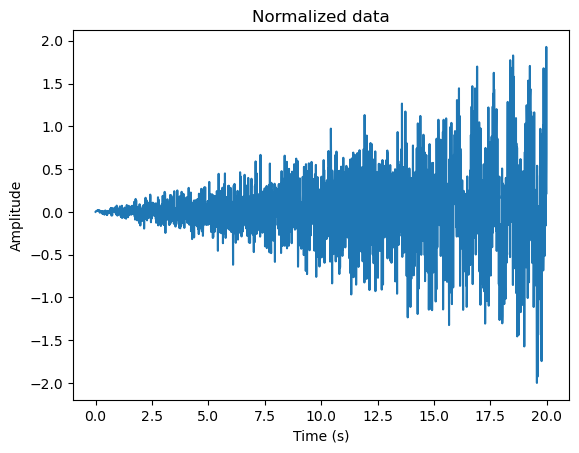

The share of points that are outside the 95% variability interval is 0.0%
The share of y t+1 that are outside the 95% variability interval is 0.04%


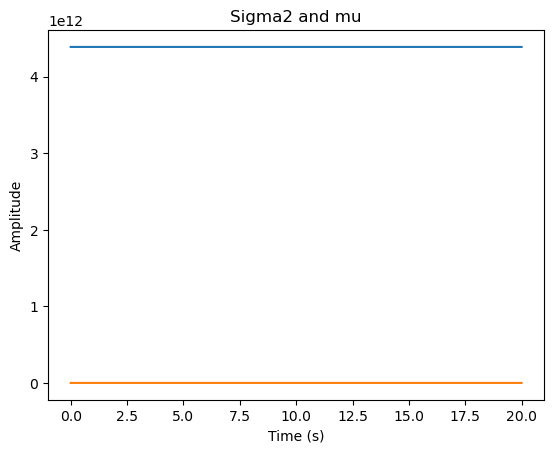

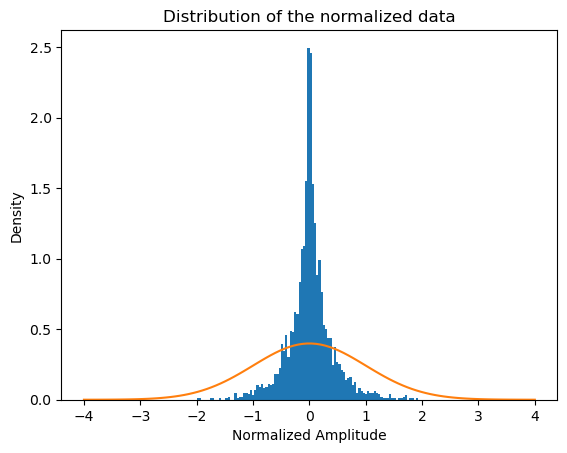

In [50]:
import GAS_norm
reload(GAS_norm)
from GAS_norm import SD_Normalization_Gaussian 
from GAS_norm import SD_Normalization_Student
import numpy as np

#Set the normalization strngth for the mean and the variance from 0 to 1
mean_norm_strength = 1
var_norm_strength = 1

y, y_train, y_test, t = series_generator(2500)
y, y_train = y*10**5, y_train*10**5
print(np.mean(y_train), np.std(y_train))

norm_strength = [mean_norm_strength*0.5, var_norm_strength*0.5]
#mu_list, sigma2_list, y_norm = SD_Normalization_Gaussian(y, y_train, 'Full', mode='predict', norm_strength=[0.5, 0.5])
mu_list, sigma2_list, y_norm, alpha_mu, alpha_sigma, beta_mu, beta_sigma, omega_mu, omega_sigma, nu = SD_Normalization_Student(y, y_train,  mode='predict', norm_strength=norm_strength)



#Plot the normalized data

plt.plot(t[0:T], y_norm)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Normalized data')
plt.show()

#Plot the original data with the predicted mean and 95% variability interval

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t[0:T], y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=t[0:T], y=mu_list, mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=t[0:T], y=mu_list+1.96*np.sqrt(sigma2_list), mode='lines', name='Upper Bound'))
fig.add_trace(go.Scatter(x=t[0:T], y=mu_list-1.96*np.sqrt(sigma2_list), mode='lines', name='Lower Bound'))
fig.update_layout(title='Dampened Sinusoid', xaxis_title='Time (s)', yaxis_title='Amplitude')
fig.show()


#Write the share of points that are outside the 95% variability interval

share = np.sum((y > mu_list+1.96*np.sqrt(sigma2_list)) | (y < mu_list-1.96*np.sqrt(sigma2_list)))/len(y)
print("The share of points that are outside the 95% variability interval is {}%".format(share*100))

#Write the share of y_{t+1} that are outside the 95% variability interval

share = np.sum((y[1:] > mu_list[0:-1]+1.96*np.sqrt(sigma2_list[0:-1])) | (y[1:] < mu_list[0:-1]-1.96*np.sqrt(sigma2_list[0:-1])))/len(y)
print("The share of y t+1 that are outside the 95% variability interval is {}%".format(share*100))

#Plot sigma_list and mu_list in the same plot
plt.plot(t[0:T], sigma2_list)
plt.plot(t[0:T], mu_list)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sigma2 and mu')
plt.show()

#Plot the distributino of the normalized and unormalized data and compare it with a standard normal distribution

import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y_norm, bins=100, density=True)
plt.plot(np.linspace(-4, 4, 100), stats.norm.pdf(np.linspace(-4, 4, 100), 0, 1))
plt.xlabel('Normalized Amplitude')
plt.ylabel('Density')
plt.title('Distribution of the normalized data')
plt.show()



In [5]:
#Redo the training with the new strategy
import Models
reload(Models)
from Models import GAS_Net
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils


#Divide the data into training and testing sets. The first 1500 time steps of y will be used for training and the last 1000 for testing.

y_norm_train = y_norm[0:T_train]
y_norm_test = y_norm[T_train:T]

#Define the model, loss function, and optimizer and train it for 100 epochs.
#The training is divided in more phases to avoid gradients size problems.
#We first train only the mu layer to make linear predictions with mean information. All the rest is set to zero. 
#Then we fix the mu layer and train the nonlinear part. 
#Fianllly we train the sigma layer.


gas_net = GAS_Net()
gas_net.float()
gas_net.train()
criterion = nn.MSELoss()
model_parameters = gas_net.named_parameters()
optimizer_mu = optim.Adam([param for name, param in model_parameters if 'mu_layer' in name], weight_decay=1e-5)
model_parameters = gas_net.named_parameters()
optimizer_eps = optim.Adam([param for name, param in model_parameters if 'fc1' in name or 'fc2' in name or 'fc3' in name or 'relu' in name], weight_decay=1e-5)
model_parameters = gas_net.named_parameters()
optimizer_sigma = optim.Adam([param for name, param in model_parameters if 'sigma_layer' in name], weight_decay=1e-5)
optimizer_list = [optimizer_mu, optimizer_eps, optimizer_sigma]

for phase in range(2):
    optimizer = optimizer_list[phase]
    for epoch in range(100):  # loop over the dataset multiple times
        running_loss = 0.0
        for i in range(0, T_train - 200, 50):
            # get the inputs; data is a list of [inputs, labels]
            
            inputs=y_norm_train[i:i+200]
            inputs = torch.tensor(inputs)
            labels = torch.tensor(y_train[i+200:i+250])
            mu_vector = torch.tensor(mu_list[i:i+200])
            sigma2_vector = torch.tensor(sigma2_list[i:i+200])

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = gas_net(inputs.float(), mu_vector.float(), sigma2_vector.float(), 1)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
        print('[%d] loss: %.10f' %
                (epoch + 1, running_loss))
        running_loss = 0.0

print('Finished Training')

[1] loss: 2409.6652259827
[2] loss: 1640.9995250702
[3] loss: 1591.8650207520
[4] loss: 1550.2031707764
[5] loss: 1626.4735336304
[6] loss: 1599.6339397430
[7] loss: 1516.8874988556
[8] loss: 1444.5236759186
[9] loss: 1415.2836627960
[10] loss: 1395.7933616638
[11] loss: 1364.9733934402
[12] loss: 1338.2029323578
[13] loss: 1317.7493038177
[14] loss: 1300.7975225449
[15] loss: 1286.0857286453
[16] loss: 1272.5012702942
[17] loss: 1259.3489322662
[18] loss: 1246.5028142929
[19] loss: 1234.1505661011
[20] loss: 1222.5528564453
[21] loss: 1211.9244213104
[22] loss: 1202.3958454132
[23] loss: 1194.0148868561
[24] loss: 1186.7596263885
[25] loss: 1180.5525550842
[26] loss: 1175.2743473053
[27] loss: 1170.7792253494
[28] loss: 1166.9130759239
[29] loss: 1163.5307478905
[30] loss: 1160.5137310028
[31] loss: 1157.7782363892
[32] loss: 1155.2781457901
[33] loss: 1153.0020551682
[34] loss: 1150.9627671242
[35] loss: 1149.1863951683
[36] loss: 1147.6998863220
[37] loss: 1146.5222988129
[38] loss:

In [6]:
#Test the model on the entire data set and plot the results.
gas_net.eval()
y_pred = []
for i in range(0, T - 200, 50):
    inputs=y_norm[i:i+200]
    inputs = torch.tensor(inputs)
    mu_vector = torch.tensor(mu_list[i:i+200])
    sigma2_vector = torch.tensor(sigma2_list[i:i+200])
    outputs = gas_net(inputs.float(), mu_vector.float(), sigma2_vector.float(), 1)
    y_pred.append(outputs.detach().numpy())

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(T-200)

#plot with plotly with a line where the training set ends

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t[0:T], y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=t[200:T], y=y_pred, mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=[t[T_train], t[T_train]], y=[-20, 150], mode='lines', name='Training Set End'))
fig.update_layout(title='Dampened Sinusoid', xaxis_title='Time (s)', yaxis_title='Amplitude')
fig.show()

#Compute the total error on the test set.

error = 0
for i in range(T_train, T):
    error = error + (y[i] - y_pred[i-200])**2
error = error/T_test
print(error)

413.7688065608833


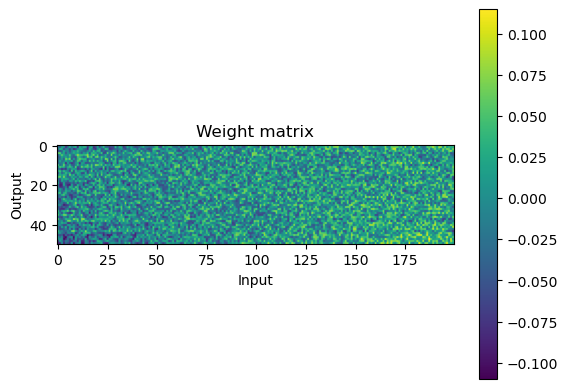

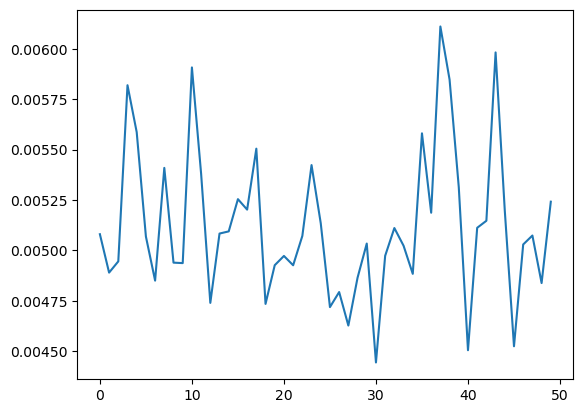

In [7]:
#Plot the weight matrix of the last layer of the network as an heatmap and add the legend of the colorbar

weights = gas_net.mu_layer.weight.detach().numpy()
plt.imshow(weights)
plt.colorbar()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Weight matrix')

plt.show()

#Now plot the mean of the weights with respect to each input

weights = gas_net.mu_layer.weight.detach().numpy()
plt.plot(weights.mean(axis=1))






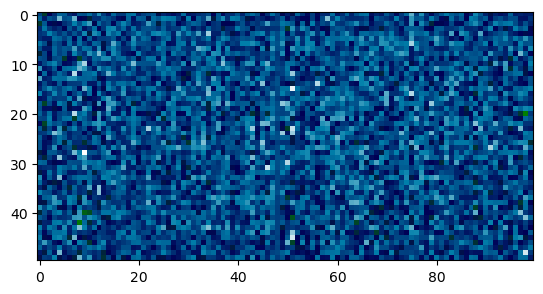

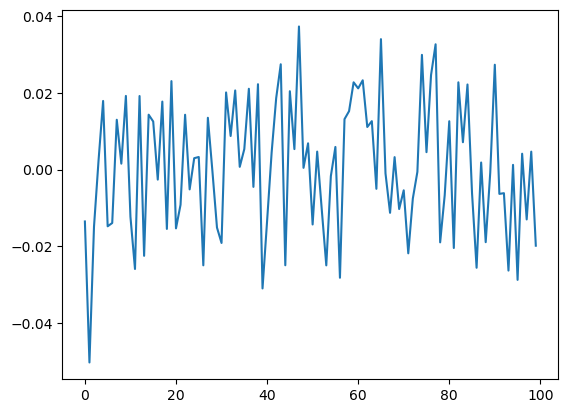

In [8]:
#Plot the weight matrix of the last layer of the network as an heatmap

weights = gas_net.fc3.weight.detach().numpy()
plt.imshow(weights, interpolation='nearest', cmap=plt.cm.ocean)

plt.show()

#Now plot the mean of the weights with respect to each input

weights = gas_net.fc3.weight.detach().numpy()
plt.plot(weights.mean(axis=0))


In [9]:
#Define a neural network class that use Revin as normalization procedure
#Revin expect the input and output to be (batch, time, features) so we need to reshape the data
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils


In [10]:
import Models
reload(Models)
from Models import Revin_Net


#Define the model, loss function, and optimizer and train it for 100 epochs.

net = Revin_Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), weight_decay=1e-5)
net.train()

for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(0, T_train - 200, 50):
        # get the inputs; data is a list of [inputs, labels]
        inputs=y_train[i:i+200]
        inputs = torch.tensor(inputs)
        labels = torch.tensor(y_train[i+200:i+250])

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.float())
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('[%d] loss: %.10f' %
            (epoch + 1, running_loss))
    running_loss = 0.0

print('Finished Training')

[1] loss: 1157.5085983276
[2] loss: 426.1757674217
[3] loss: 319.5250322819
[4] loss: 273.5109198093
[5] loss: 249.9597620964
[6] loss: 227.2579605579
[7] loss: 202.5924875736
[8] loss: 177.6058925390
[9] loss: 155.8948366642
[10] loss: 133.3376364708
[11] loss: 117.2521455288
[12] loss: 105.7885867953
[13] loss: 89.0967937708
[14] loss: 81.8837920129
[15] loss: 88.8000761569
[16] loss: 69.0981927812
[17] loss: 100.1001654863
[18] loss: 150.0907832384
[19] loss: 118.1175898910
[20] loss: 197.4231319427
[21] loss: 91.2215461731
[22] loss: 136.7607430220
[23] loss: 104.0765146613
[24] loss: 65.2810881138
[25] loss: 44.3353116512
[26] loss: 49.5183466673
[27] loss: 35.9996196255
[28] loss: 32.7374001443
[29] loss: 28.8766729012
[30] loss: 30.2199519724
[31] loss: 26.2777995542
[32] loss: 23.5339630060
[33] loss: 23.5509881712
[34] loss: 22.8279042728
[35] loss: 23.6007137150
[36] loss: 20.2195750736
[37] loss: 22.4122313187
[38] loss: 21.1384855583
[39] loss: 23.6949618235
[40] loss: 26.7

In [11]:
#Test the model on the entire data set and plot the results.
net.eval()
y_pred = []
for i in range(0, T - 200, 50):
    inputs=y[i:i+200]
    inputs = torch.tensor(inputs)
    outputs = net(inputs.float())
    y_pred.append(outputs.detach().numpy())

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(T - 200)

#plot with plotly with a line where the training set ends
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t[0:T], y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=t[200:T], y=y_pred, mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=[t[T_train], t[T_train]], y=[-20, 150], mode='lines', name='Training Set End'))
fig.update_layout(title='Dampened Sinusoid', xaxis_title='Time (s)', yaxis_title='Amplitude')
fig.show()

#Compute the total error on the test set.
error = 0
for i in range(T_train, T):
    error = error + (y[i] - y_pred[i-200])**2
error = error/T_test
print(error)

323.99197328987333


## Autoregressive GAS Test

In [12]:
#Redo the training with the new strategy
import Models
reload(Models)
from Models import AR_GAS_Net
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils


#Divide the data into training and testing sets. The first 1500 time steps of y will be used for training and the last 1000 for testing.

y_norm_train = y_norm[0:T_train]
y_norm_test = y_norm[T_train:T]

#Define the model, loss function, and optimizer and train it for 100 epochs.
#The training is divided in more phases to avoid gradients size problems.
#We first train only the mu layer to make linear predictions with mean information. All the rest is set to zero. 
#Then we fix the mu layer and train the nonlinear part. 
#Fianllly we train the sigma layer.


ar_gas_net = AR_GAS_Net(k = 50, use_deep_preds=False)
ar_gas_net.float()
ar_gas_net.train()
criterion = nn.MSELoss()
optimizer = optim.Adam(ar_gas_net.parameters(), weight_decay=1e-5)

for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(0, T_train - 200, 50):
        # get the inputs; data is a list of [inputs, labels]
        
        inputs=y_norm_train[i:i+200]
        inputs = torch.tensor(inputs)
        labels = torch.tensor(y_train[i+200:i+250])
        last_mu = torch.tensor(mu_list[i+199])
        last_sigma2 = torch.tensor(sigma2_list[i+199])

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = ar_gas_net(inputs.float(), last_mu.float(), last_sigma2.float(), alpha_mu, alpha_sigma, beta_mu, beta_sigma, omega_mu, omega_sigma, nu, norm_strength)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
    print('[%d] loss: %.10f' %
            (epoch + 1, running_loss))
    running_loss = 0.0

[1] loss: 461.9881083965
[2] loss: 362.5654950142
[3] loss: 268.2948760986
[4] loss: 221.6389867067
[5] loss: 188.3883886933
[6] loss: 156.5394954681
[7] loss: 122.5861477852
[8] loss: 102.7848953605


KeyboardInterrupt: 

In [ ]:
#Test the model on the entire data set and plot the results.
ar_gas_net.eval()
y_pred = []

for i in range(0, T - 200, 50):
    inputs=y_norm[i:i+200]
    inputs = torch.tensor(inputs)
    last_mu = torch.tensor(mu_list[i+199])
    last_sigma2 = torch.tensor(sigma2_list[i+199])
    outputs = ar_gas_net(inputs.float(), last_mu.float(), last_sigma2.float(), alpha_mu, alpha_sigma, beta_mu, beta_sigma, omega_mu, omega_sigma, nu, norm_strength)
    y_pred.append(outputs.detach().numpy())

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(T-200)

#plot with plotly with a line where the training set ends
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t[0:T], y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=t[200:T], y=y_pred, mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=[t[T_train], t[T_train]], y=[-20, 150], mode='lines', name='Training Set End'))
fig.update_layout(title='Dampened Sinusoid', xaxis_title='Time (s)', yaxis_title='Amplitude')
fig.show()

#Compute the total error on the test set.
error = 0
for i in range(T_train, T):
    error = error + (y[i] - y_pred[i-200])**2
error = error/T_test
print(error)

225.364360742466
